In [1]:
import glob
import copy
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image
import random

In [2]:
# imagesとlabelsリストの取得
data_dir = "after_split/train"
image_paths = [os.path.join(data_dir, 'images', filename) for filename in os.listdir(os.path.join(data_dir, 'images')) if filename.endswith(".jpg")]
label_paths = [os.path.join(data_dir, 'labels', filename) for filename in os.listdir(os.path.join(data_dir, 'labels')) if filename.endswith(".txt")]

In [3]:
# 訓練画像にbboxを書き込む
# 描画した画像の保存先
os.makedirs("visualize_data", exist_ok=True)

# 描画した画像の保存先を変数に格納
dir = "visualize_data/"

# 全ての訓練画像にbboxを描画
for image_path, label_path in list(zip(image_paths, label_paths)):
    filename = os.path.basename(image_path)
    # 画像の読み込み
    img = cv2.imread(image_path)
    # bboxを描画したら画像が変わるためコピーをする
    img_draw = img.copy()
    # 高さと幅を取得
    h, w = img.shape[:2]
    # bboxの読み込み
    with open(label_path, "r") as f:
        bbox_list = f.readlines()

        for bbox in bbox_list:
            bb_cx, bb_cy, bb_w, bb_h = bbox.replace('\n', '').split(' ')[1:]
            bb_cx, bb_cy, bb_w, bb_h = float(bb_cx)*w, float(bb_cy)*h, float(bb_w)*w, float(bb_h)*h
            tlx, tly, brx, bry = int(bb_cx-bb_w/2), int(bb_cy-bb_h/2), int(bb_cx+bb_w/2), int(bb_cy+bb_h/2)
    
            # 四角を描画(左上, 右下)
            img_draw = cv2.rectangle(img_draw, (tlx, tly), (brx, bry), (0, 0, 255), thickness=2)
        # 画像の書き込み
        cv2.imwrite(os.path.join(dir, filename), img_draw)

In [4]:
# 再度同じシード値で乱数を生成
random.seed(0)
# bboxを描画した画像が保存されたdirへのpath
path = "visualize_data"

# ランダムな9枚のbboxを描画した画像の相対pathのリスト
image_list = []

# フォルダ内のすべてのファイル名を取得
filenames = os.listdir(path)

# ランダムに 9 枚の画像を選択
for _ in range(9):
    random_filename = random.choice(filenames)
    image_list.append(os.path.join(path, random_filename))

print(image_list)

['visualize_data\\IMG_0053 2_jpg.rf.423aedd36faa4d80660bd041f280fdac.jpg', 'visualize_data\\IMG_0061_jpg.rf.43a863f68c59d7d782c00398e3361e59.jpg', 'visualize_data\\IMG_0003 4_jpg.rf.f9cf0333c4f525754b9c6212805a5bec.jpg', 'visualize_data\\IMG_0029 2_jpg.rf.4346e9f11f08c8f43df8da75490a8d3d.jpg', 'visualize_data\\IMG_0098_jpg.rf.5e8e3572da1c1aae4565bc705900131b.jpg', 'visualize_data\\IMG_0086_jpg.rf.4aa2963e7de057f03a0a68b2a3e83c55.jpg', 'visualize_data\\IMG_0057_jpg.rf.4c70b90c7846ee9ce3b879c93336dd6c.jpg', 'visualize_data\\IMG_0036 2_jpg.rf.473da1619a52e7685ccad0429c4dd653.jpg', 'visualize_data\\IMG_0083_jpg.rf.c61be51dc0432b815b0a280200dc1d73.jpg']


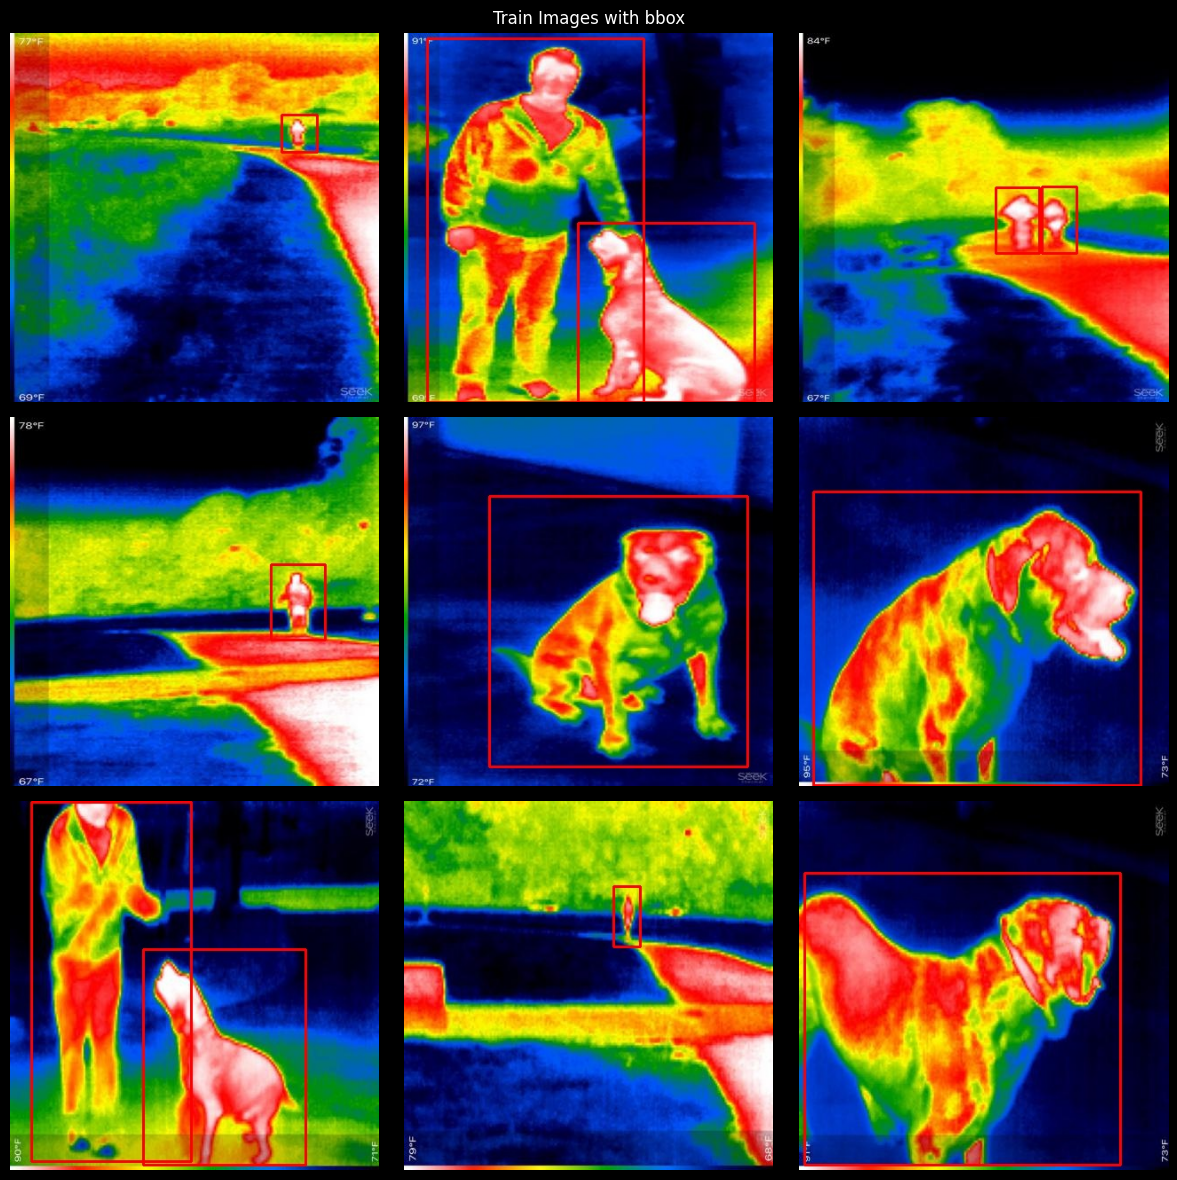

In [5]:
# 3x3のサブプロットを作成
plt.style.use("dark_background")
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# 各画像を読み込んで描画
for i, image_path in enumerate(image_list):
    row = i // 3  # 行番号を取得
    col = i % 3  # 列番号を取得
    image = plt.imread(image_path)
    axes[row, col].imshow(image)

# タイトルと軸ラベルを設定
fig.suptitle("Train Images with bbox")
for ax in axes.flat:
    ax.axis('off')  # 軸ラベルと目盛線を非表示

# グラフを表示
plt.tight_layout()  # サブプロット間の余白を調整
plt.savefig("train_imgs_with_bbox.jpg")
# plt.show()

## yamlファイルを作成
* 1・・・person  
* 0・・・dog  
annotation時に確認

In [6]:
import yaml
import os

In [7]:
#  データセット情報
dataset_info = {
    "train": "C:/Users/yuuki/programming/my_study/annotation_tutorial/after_split/train/images",  # train データセットのサブディレクトリ
    "val": "C:/Users/yuuki/programming/my_study/annotation_tutorial/after_split/val/images",  # val データセットのサブディレクトリ
    "test": "C:/Users/yuuki/programming/my_study/annotation_tutorial/after_split/test/images",  # test データセットのサブディレクトリ
    "nc": 2,  # クラスの数
    "names": ["dog", "person"],  # クラス名
}

# YAML ファイルへの書き込み
with open("data.yaml", "w") as f:
    yaml.dump(dataset_info, f, default_flow_style=False)